(962, 2)


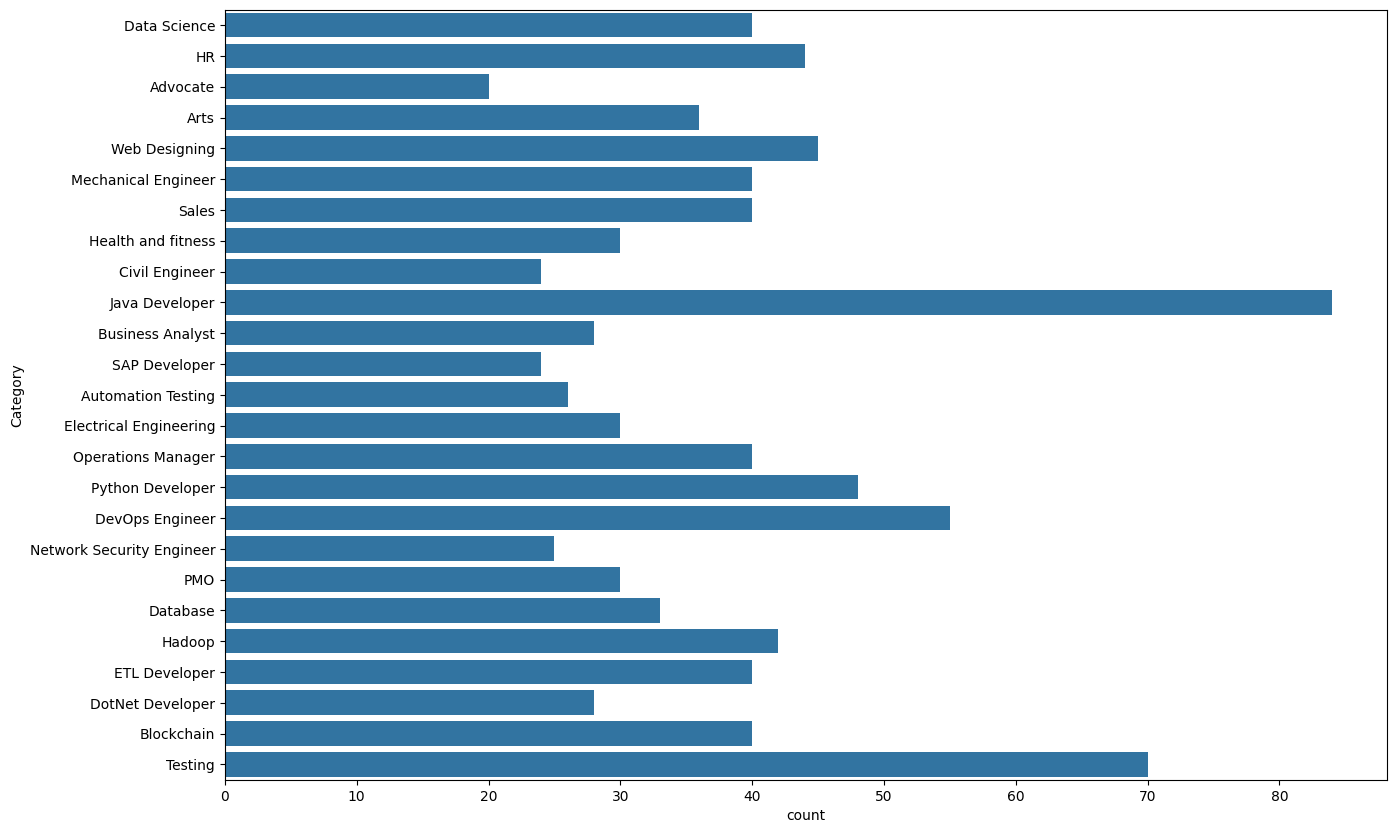

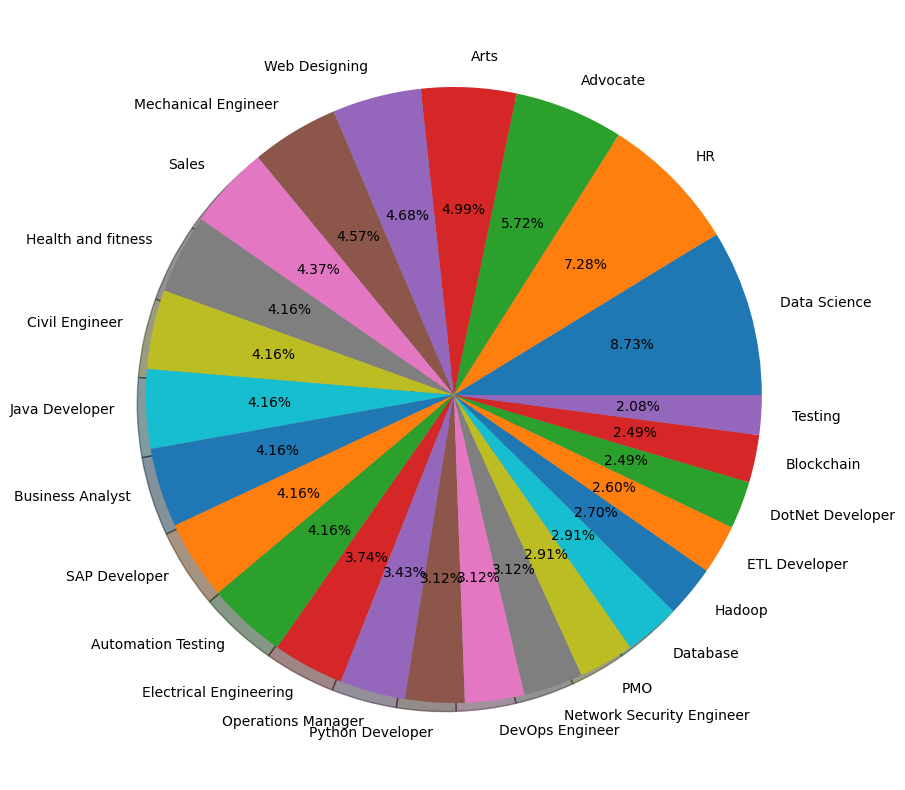

Accuracy: 0.9844559585492227


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

# Load Dataset
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

# Display basic info
df.head()
print(df.shape)

# Visualize category distribution
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Text Cleaning Function
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    return cleanText

# Apply Text Cleaning
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

# Encode Categories
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

# Train KNN Classifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)

# Predict and Evaluate
ypred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, ypred))

# Save Model and Vectorizer
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [8]:
!pip install flask flask-ngrok flask-cors


In [12]:
from google.colab import files
files.download('clf.pkl')
files.download('tfidf.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>